# 패키지 설치 및 세팅

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
from konlpy.tag import Okt
from konlpy.tag import Kkma
import re

In [2]:
# 화면 확장

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### 크롬 드라이버 실행

In [3]:
chromedriver = 'chromedriver.exe' 
driver = webdriver.Chrome(chromedriver)
driver.implicitly_wait(2)  # 로딩 될때까지 3초 대기

# 원티드 웹스크래핑

### 로그인

In [4]:
driver.get('https://www.wanted.co.kr/') # 원티드 사이트 열기
time.sleep(1) # 로딩시간 1초

# 웹 창의 크기가 전체화면이어야 가능
login='//*[@id="__next"]/div[1]/div/nav/aside/ul/li[2]/button'
driver.find_element_by_xpath(login).click()
time.sleep(1)


login_kakao='//*[@id="__next"]/div/div/div/div[2]/form/div[2]/button[1]'
driver.find_element_by_xpath(login_kakao).click()
time.sleep(1)

tag_id = driver.find_element_by_xpath('//*[@id="input-loginKey"]')
tag_pw = driver.find_element_by_xpath('//*[@id="input-password"]')
# tag_id.clear()
# tag_pw.clear()
# time.sleep(1)

In [5]:
tag_id.send_keys('tkdtn7298@naver.com')
time.sleep(0.5)

tag_pw.send_keys('jik0602')
time.sleep(0.5)

login1='//*[@id="mainContent"]/div/div/form/div[4]/button[1]'
driver.find_element_by_xpath(login1).click()
time.sleep(2)

### 채용사이트 들어가기

In [6]:
driver.get('https://www.wanted.co.kr/wdlist/518/655?country=kr&job_sort=company.response_rate_order&years=-1&locations=all')

### 서울지역 선택

In [7]:
driver.find_element_by_xpath('//*[@id="__next"]/div[3]/div/div/div[1]/div[1]/div/div[1]/button').click()
driver.find_element_by_xpath('//*[@id="MODAL_BODY"]/div[2]/div[1]/ul/li[2]/button').click()
driver.find_element_by_xpath('//*[@id="__next"]/div[3]/div/div/div[1]/div[1]/div[2]/div[1]/div[3]/button').click()

### 스크롤 다운

In [8]:
from selenium.webdriver.common.keys import Keys
import random

for c in range(0,30):
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(random.uniform(0.5,1))

### 웹 페이지 정보 불러오기

In [9]:
html = driver.page_source
bs = BeautifulSoup(html, 'html.parser')

In [10]:
job_list = bs.select('#__next > div.JobList_cn__t_THp > div > div > div.List_List_container__JnQMS > ul > li')

In [11]:
len(job_list)

55

In [12]:
job_list[len(job_list)-1].text

'사업기획팀 인공지능 개발디지털존마포지점서울.한국채용보상금 1,000,000원'

In [13]:
job_list[0]

<li><div class="Card_className__u5rsb" data-cy="job-card"><a aria-label="position link" class="" data-ai-score="" data-ai-score-status="" data-attribute-id="position__click" data-company-id="490" data-company-name="오비이랩(Obelab)" data-job-category="IT" data-job-category-id="518" data-position-id="135857" data-position-name="데이터(신호처리) 엔지니어" data-recommend-model-index="0" data-recommend-model-status="notBase" data-response-level="very_high" data-response-rate="97.9" href="/wd/135857"><header style='background-image: url("https://image.wanted.co.kr/optimize?src=https%3A%2F%2Fstatic.wanted.co.kr%2Fimages%2Fcompany%2F490%2F8xhxi1fzlqtanaak__400_400.jpg&amp;w=400&amp;q=75");'><button aria-label="bookmark button" class="bookmarkBtn" data-attribute-id="position__bookmark__click" data-company-id="490" data-company-name="오비이랩(Obelab)" data-job-category="IT" data-job-category-id="518" data-kind="add" data-position-id="135857" data-position-name="데이터(신호처리) 엔지니어" type="button"><svg fill="none" heigh

In [14]:
url_list = []
for i in range(len(job_list)):
    url_list.append('http://www.wanted.co.kr' + job_list[i].find('a')['href'])

In [15]:
url_list

['http://www.wanted.co.kr/wd/135857',
 'http://www.wanted.co.kr/wd/135858',
 'http://www.wanted.co.kr/wd/121460',
 'http://www.wanted.co.kr/wd/87760',
 'http://www.wanted.co.kr/wd/133816',
 'http://www.wanted.co.kr/wd/61066',
 'http://www.wanted.co.kr/wd/132012',
 'http://www.wanted.co.kr/wd/130687',
 'http://www.wanted.co.kr/wd/63716',
 'http://www.wanted.co.kr/wd/12236',
 'http://www.wanted.co.kr/wd/81512',
 'http://www.wanted.co.kr/wd/137586',
 'http://www.wanted.co.kr/wd/134261',
 'http://www.wanted.co.kr/wd/131534',
 'http://www.wanted.co.kr/wd/134915',
 'http://www.wanted.co.kr/wd/43570',
 'http://www.wanted.co.kr/wd/93046',
 'http://www.wanted.co.kr/wd/96202',
 'http://www.wanted.co.kr/wd/116553',
 'http://www.wanted.co.kr/wd/101300',
 'http://www.wanted.co.kr/wd/126188',
 'http://www.wanted.co.kr/wd/129234',
 'http://www.wanted.co.kr/wd/119448',
 'http://www.wanted.co.kr/wd/106368',
 'http://www.wanted.co.kr/wd/100812',
 'http://www.wanted.co.kr/wd/41751',
 'http://www.wanted.c

In [16]:
response = requests.get(url_list[0])

html = response.text
bs = BeautifulSoup(html, 'html.parser')
print(bs)

<!DOCTYPE html>
<html class="ko kr" lang="ko-KR"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, user-scalable=no" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="no-store" http-equiv="cache-control"/><meta content="website" property="og:type"/><meta content="ko_KR" property="og:locale"/><meta content="316787678519888" property="fb:app_id"/><meta content="#ffffff" name="theme-color"/><meta content="app-id=com.wanted.android.wanted" name="google-play-app"/><meta content="app-id=1074569961" name="apple-itunes-app"/><meta content="#ffffff" name="msapplication-TileColor"/><meta content="//static.wanted.co.kr/favicon/144x144.png" name="msapplication-TileImage"/><meta content="ef4f7f8504106401fe915b922514a5b352f59ca2" name="naver-site-verification"/><meta content="KEXLzgQBOVNqw8uNBWOXYOz2L4vUApbKxqxV6twdkxQ" name="google-site-verification"/><title>[오비이랩(Obelab)] 데이터(신호처리) 엔지니어 채용 | 원티드</title><meta content="[오비이랩(Obelab

# 데이터세트 만들기

In [17]:
JOB = pd.DataFrame(columns = ['이름','회사정보','주요업무', '자격요건', '우대사항','혜택 및 복지','URL', '태그정보', '스택'])

In [18]:
# 첫 칸에 빈 칸이 들어와서 2번째 리스트부터 수집 but 누락되는 것이 있음(리스트가 1개인 경우)
# REAL

for i in range(0,len( url_list)):
    driver.get(url_list[i])
    response = requests.get(url_list[i])
    html = response.text
    bs = BeautifulSoup(html, 'html.parser')
    
    # 주요업무 스크래핑
    a = str(bs)[str(bs).find('\\n\\n주요업무') + 8 : str(bs).find('\\n\\n자격요건') -2].replace('\\n','')
    if len(a) < 2000:
        JOB.loc[i, '주요업무'] = a
    else:
        JOB.loc[i, '주요업무'] = ''
    
    # 자격요건 
    b = str(bs)[str(bs).find('\\n\\n자격요건') + 8 : str(bs).find('\\n\\n우대사항') -2].replace('\\n','')
    if len(b) < 2000:
        JOB.loc[i, '자격요건'] = ''.join(b)
    
    # 우대조건 스크래핑
    c = str(bs)[str(bs).find('\\n\\n우대사항') + 8 : str(bs).find('\\n\\n혜택') -2].replace('\\n','')
    if len(c) < 2000:
        JOB.loc[i, '우대사항'] = ''.join(c)
    
    # 혜택 및 복지
    d = str(bs)[str(bs).find('\\n\\n혜택 및 복지') + 11 : str(bs).find('company_name') -3].replace('\\n','')
    if len(d) < 2000:
        JOB.loc[i, '혜택 및 복지'] = ''.join(d)
    
    # URL
    JOB.loc[i, 'URL'] = url_list[i]
    
    # 태그정보
    tag = ''
    time.sleep(0.5)
    for j in driver.find_elements_by_xpath('//*[@id="__next"]/div[3]/div[1]/div[1]/div/section[2]/div[3]/ul/li'):
        tag = tag + j.text
    JOB.loc[i, '태그정보'] = tag.replace('#', ' ')
    
    # 공고 제목
    e = str(bs)[str(bs).find('<title>') + 7 : str(bs).find('</title>') -5].replace('\\n','')
    JOB.loc[i, '이름'] = ''.join(e)
    
    # 회사 정보
    f = str(bs.text)[str(bs.text).find('"jd"') + 6 : str(bs.text).find('주요업무\\n')-6]
    if len(f) < 2000:
        JOB.loc[i, '회사정보'] = ''.join(d)
    
    # 기술 stack
    stack = ''
    for j in driver.find_elements_by_xpath('//*[@id="__next"]/div[3]/div[1]/div[1]/div/div[2]/section[1]/p[6]/div'):
        stack = stack + j.text
    JOB.loc[i, '스택'] = stack.replace('\n',' ')

In [19]:
JOB

,이름,회사정보,주요업무,자격요건,우대사항,혜택 및 복지,URL,태그정보,스택
0,[오비이랩(Obelab)] 데이터(신호처리) 엔지니어 채용,• 시차출퇴근제 시행(08:00~10:30 출근)• 매월 마지막주 금요일 4시 퇴근...,• fNIRS 데이터 알고리즘 개발 및 적용• fNIRS 데이터 기반 신호처리 자동...,• 석/박사 이상• Matlab/Python을 이용한 시계열 데이터 분석 경험(생체...,"• 실무 경험자 우대• 의공학과, 컴퓨터 사이언스 전공자• fNIRS, EEG, E...",• 시차출퇴근제 시행(08:00~10:30 출근)• 매월 마지막주 금요일 4시 퇴근...,http://www.wanted.co.kr/wd/135857,연봉업계평균이상 인원급성장 50명이하 설립4~9년 스타트업 식비 건강검진 동호회 제조,Git Github MATLAB iOS Linux C / C++ HTML Pytho...
1,[오비이랩(Obelab)] 데이터 분석가/연구자 채용,• 시차출퇴근제 시행(08:00~10:30 출근)• 매월 마지막주 금요일 4시 퇴근...,• fNIRS 측정치를 활용한 뇌 인지 기능 연구 및 데이터 분석• 인지 행동 지표...,• 석/박사 이상• Matlab/Python을 이용한 인지 및 행동 데이터 분석 경...,"• 실무 경험자 우대• 인지-뇌와 관련된 융합 학문 전공자(인지 심리학, 인지신경과...",• 시차출퇴근제 시행(08:00~10:30 출근)• 매월 마지막주 금요일 4시 퇴근...,http://www.wanted.co.kr/wd/135858,연봉업계평균이상 인원급성장 50명이하 설립4~9년 스타트업 식비 건강검진 동호회 제조,Git Github MATLAB iOS Linux C / C++ HTML Pytho...
2,[브이티피엘] 백엔드/프런트엔드 개발자 채용,• 개인 법인카드 제공• 일의 몰입도 극대화를 위한 주 35시간 근무 (10 to ...,"• API를 활용한 크롤링, 자동재고관리 개발• 비지니스를 선도하는 IT 정보화 추...","• 컴퓨터공학 관련 전공자 (신입인 경우)• Node.js, MongoDB 개발 역...",• 해당 직무 수행의 포텐셜이 충분하다 판단되면 신입도 가능 (증명 가능한 학습...,• 개인 법인카드 제공• 일의 몰입도 극대화를 위한 주 35시간 근무 (10 to ...,http://www.wanted.co.kr/wd/121460,인원급성장 퇴사율 6~10% 50명이하 설립10년이상 주35시간 리프레시휴가 간식...,MongoDB JavaScript Node.js Python Data Analysi...
3,[알고리즘랩스] 파이썬 서버(백엔드) 개발자 채용,• 직무능력 향상을 위한 교육 및 세미나 지원• 도서 구입 지원• 명절 선물/생일 ...,• AlgorithmLABS 서버 운영 및 관리• AI Optimizer 기술 개발...,"• 석사 졸업• Python Web Framework(Django, fastapi ...",• 석사 졸업• FastAPI 프로젝트 개발 경험이 있으신 분• 1년 이상 실제 서...,• 직무능력 향상을 위한 교육 및 세미나 지원• 도서 구입 지원• 명절 선물/생일 ...,http://www.wanted.co.kr/wd/87760,인원급성장 50명이하 설립4~9년 스타트업 자율복장 커피 생일선물 인공지능 기타 ...,Python
4,[에어스메디컬] Research Scientist 채용,• 자유로운 유연근무제 - 개발 인원: 재량근로시간제 또는 선택적근로시간제 - 비개...,• 딥러닝 모델 개발• 시퀀스 리컨 파이프라인 연구• MRI 콘솔 파라미터,• 수학적 사고• 집요함• Discussion,"• 임상, 의학에 관심이 많으신",• 자유로운 유연근무제 - 개발 인원: 재량근로시간제 또는 선택적근로시간제 - 비개...,http://www.wanted.co.kr/wd/133816,연봉업계평균이상 인원급성장 51~300명 설립4~9년 유연근무 스타트업 커피 간식...,딥 러닝 수학적 분석
5,[디셈버앤컴퍼니(핀트)] 핀트(fint) AI/ML 데이터 리서쳐 (전문연구요원 가...,[우리의 기업문화와 복지제도를 소개합니다]구성원들이 주도적으로 업무를 수행하며 성장...,"[범주]• AI/ML, 데이터 마이닝, 주식 투자 모델, 딥러닝, 강화 학습, 추천...",[다음의 경험이 있는 분을 찾습니다]* 전문연구요원 신규 편입 / 전직 가능• AI...,[다음의 경험이 있으면 더 좋습니다. (앞으로 이런 업무를 통해 성장할 수 있습니다...,[우리의 기업문화와 복지제도를 소개합니다]구성원들이 주도적으로 업무를 수행하며 성장...,http://www.wanted.co.kr/wd/61066,연봉상위6~10% 퇴사율5%이하 51~300명 설립4~9년 유연근무 음료 건강검진...,Git Github Android iOS Linux MySQL React C / C...
6,[게임듀오] 데이터 분석가 채용,• 동종업계 대비 경쟁력 있는 연봉 및 처우 제공• 코어 워킹 타임 (13 - 17...,• 데이터 기반(Data Informed) 의사결정에 기여하기 위해 분석 과제를 정...,"• 데이터를 다루고 시각화 하는데 있어서 필요한 Python, SQL, BI Too...",• 게임 좋아하시는 분• A/B 테스트와 통계에 대한 이해를 바탕으로 목표에 맞는 ...,• 동종업계 대비 경쟁력 있는 연봉 및 처우 제공• 코어 워킹 타임 (13 - 17...,http://www.wanted.co.kr/wd/132012,"인원급성장 51~300명 설립3년이하 IT, 컨텐츠",Node.js
7,[아인시스에이아이랩] 데이터 엔지니어(Data Engineer) 채용,"• 최고사양 장비 지급기본적으로 맥북, 4K 모니터, 매직 키보드, 매직 트랙패드를...",• 데이터 분석을 위한 알고리즘 및 개발 방향과 범위를 산정해요• 데이터 수집 및 ...,• 이공계 졸업(예정자) 혹은 관련 경력을 보유하신 분• 네트워크 애플리케이션 개발...,• 스타트업 업무경험이 있으신 분• Rust 개발 경험이 있으신 분• 머신러닝 데이...,"• 최고사양 장비 지급기본적으로 맥북, 4K 모니터, 매직 키보드, 매직 트랙패드를...",http://www.wanted.co.kr/wd/130687,퇴사율5%이하 50명이하 설립4~9년 리프레시휴가 스타트업 자율복장 식비 커피 I...,Git Slack GraphQL Java Rust C++ NoSQL RDBMS No...
8,[누비랩] 3D Vision Engineer 채용,"[처우 및 보상]• 개인의 역량, 경험을 바탕으로 면접 후 협의해요• 성과, 역량,...",• Depth Camera를 활용한 데이터 취득기술 개발• RGB + D 데이터를 ...,"• 학습과 성장에 관심이 많고, 자기 개발을 위해 노력하시는 분• 동료와의 원활한 ...",• 사내 개발 문화 만들기에 적극적으로 참여를 원하시는 분• 3D Reconstru...,"[처우 및 보상]• 개인의 역량, 경험을 바탕으로 면접 후 협의해요• 성과, 역량,...",http://www.wanted.co.kr/wd/63716,"인원급성장 50명이하 설립3년이하 스톡옵션 스타트업 커피 간식 건강검진 IT, 컨텐츠",Git Pytorch JavaScript Python TypeScript AWS D...
9,[스캐터랩(Scatterlab)] [이루다] 머신러닝 리서처 (Machine Lea...,몰입할 수 있는 환경을 추구해요• 최신형 맥북 프로 혹은 크고 아름다운 27인치 최...,"• 루다가 사람들과 더욱 정확하고, 폭넓고, 센스있게 일상적인 대화를 하기 위한 연...","• 컴퓨터 공학, 머신러닝 관련 분야 석/박사 혹은 그에 준하는 경험• PyTorc...",• ML 관련 Top-tier 학회 및 저널 Publication 실적(NeurIP...,몰입할 수 있는 환경을 추구해요• 최신형 맥북 프로 혹은 크고 아름다운 27인치 최...,http://www.wanted.co.kr/wd/12236,연봉업계평균이상 인원급성장 51~300명 설립10년이상 반려동물 커피 간식 휴게실...,Excel


In [20]:
JOB.fillna('', inplace = True)

In [21]:
necessary = []
for i in JOB['자격요건']:
    necessary.append(i)

In [22]:
necessary

['• 석/박사 이상• Matlab/Python을 이용한 시계열 데이터 분석 경험(생체 신호 우대)• 데이터 구조 및 활용 방식에 대한 지식 보유  • 논문을 바탕으로 한 선행 알고리즘 실제 구현 경험• 해당 알고리즘 validation을 통한 응용 경험• 연구 혹은 실무 프로젝트 내용 기반 면접 진행(자료 제출 필',
 '• 석/박사 이상• Matlab/Python을 이용한 인지 및 행동 데이터 분석 경험 • PsychoPy, E-prime 등의 인지 테스크 제작 경험• fNIRS/fMRI/EEG/tDCS/EyeTracker 등을 활용한 연구, 데이터 분석 경험• 기초 통계 활용(해석 및 이해) 가능 • 연구 혹은 실무 프로젝트 내용 기반 면접 진행(자료 제출 필',
 '• 컴퓨터공학 관련 전공자 (신입인 경우)• Node.js, MongoDB 개발 역량 보유자• 상품 크롤링, 웹에서 puppeteer 개발 역량 보유자• API를 통한 개발 역량 보',
 '• 석사 졸업• Python Web Framework(Django, fastapi 등)를 사용하여 프로젝트 진행 한 경험• Machine Learning 모델링 경험• DB 스키마 설계 경험• REST API 프로젝트 설계 및 구현 경험• 이슈에 대한 객관적이고 논리적인 커뮤니케이션 능력• Linux, Git, RDBMS, NoSQL 에 대한 기본적 ',
 '• 수학적 사고• 집요함• Discussion ',
 '[다음의 경험이 있는 분을 찾습니다]* 전문연구요원 신규 편입 / 전직 가능• AI/ML뿐 아니라 SW엔지니어링(개발/배포/모니터링 등) 전반에 대해 거부감이 없으신 분이면 좋겠어요.• 새로운 언어나 기술 등에 거부감이 없으신 분이면 좋겠어요.• 주도적으로 자신의 일을 찾아 문제를 해결하고 개선하는 분이면 좋겠어요.• 핀테크 등 첨단 기술의 개발 실무에 대해 관심이 있는 분이면 좋겠어요.• 논리적인 사고 능력 및 의사소통 능력이 뛰어나신 분이면 좋겠어요.• 도전적인 업무를 선호하고, 맡은 업무를 

In [23]:
work = []
for i in JOB['주요업무']:
    work.append(i)

In [24]:
work

['• fNIRS 데이터 알고리즘 개발 및 적용• fNIRS 데이터 기반 신호처리 자동화 알고리즘 개발• 데이터 전처리(디노이징) 방법 및 분석 파이프라인 고도화 • 연구자용 fNIRS 데이터 분석 프로그램 ',
 '• fNIRS 측정치를 활용한 뇌 인지 기능 연구 및 데이터 분석• 인지 행동 지표, 임상 지표 분석• 분석 파이프라인 고도화 • 연구자용 fNIRS 데이터 분석 프로그램 개발/분석 ',
 '• API를 활용한 크롤링, 자동재고관리 개발• 비지니스를 선도하는 IT 정보화 추진• 경쟁 우위를 창출하는 시스템 개발 및 구축• 업무 효율을 향상하는 업무 자동화, Process Innovation• 안정적인 IT를 제공하는 인프라 ',
 '• AlgorithmLABS 서버 운영 및 관리• AI Optimizer 기술 개발 및 pipeline 최적화• 인공지능 자동화 서비스 Backend 개발 및 운영• MLO',
 '• 딥러닝 모델 개발• 시퀀스 리컨 파이프라인 연구• MRI 콘솔 파라미터 ',
 '[범주]• AI/ML, 데이터 마이닝, 주식 투자 모델, 딥러닝, 강화 학습, 추천시스템, 자연어 처리, 빅데이터 [다음의 업무를 통해 함께 변화와 혁신을 이끌어갑니다]• 투자 전략에 대한 SW엔지니어링(개발/배포/모니터링)을 담당해요.• 금융 데이터(주로 time series)를 수집 및 정제해요.• (AI/ML기반) 주식 투자 모델, 주문 집행 엔진을 개발/운영해요.• 최신 AI/ML 기술 조사 및 금융분야 적용해요.[주요 기술스택]• Programming Language  - Python  - C/C++• AI/ML  - Tensorflow  - Pytorch   - Keras  - Scikit-Learn  - Numpy  - Pandas• Etc  - Docker  - Git (GitLab, GitLab CI/CD Pipeline)  - Confluence[디셈버 합류 여정]서류전형 – 역량 면접(+코딩테스트) – 인성 면접 – Culture Fit '

In [25]:
plus = []
for i in JOB['우대사항']:
    plus.append(i)

In [26]:
plus

['• 실무 경험자 우대• 의공학과, 컴퓨터 사이언스 전공자• fNIRS, EEG, ECG, Eye Tracker와 같은 생체신호 처리 분석 경력자• 필터링, PCA, ICA 등을 활용 한 전처리 경험• ML/DL 활용 경험 우대 (개발 경험 없어도 무관)• 데이터베이스 구축 또는 활용 경험 • 통계 관련 지식 보유자• 신규 알고리즘 도입에 적극성, 검증에 있어서 치밀함을 보유한',
 '• 실무 경험자 우대• 인지-뇌와 관련된 융합 학문 전공자(인지 심리학, 인지신경과학, 행동경제학, 뇌인지과학, 바이오뇌공학 등)• 아동/발달심리학, 언어심리학, 이상/임상심리학 등 인지 기능의 발달 또는 측정에 관한 분야 전공자 • 연구 방법론, 통계 지식, 프로그래밍 스킬 보',
 '• 해당 직무 수행의 포텐셜이 충분하다 판단되면 신입도 가능   (증명 가능한 학습경험, 과제수행 이력 필수)• 학습에 적극적인 분• 개발 가능한 Skill Set 추가 ',
 '• 석사 졸업• FastAPI 프로젝트 개발 경험이 있으신 분• 1년 이상 실제 서비스를 개발, 운용 하신 분• OIDC기반 SSO 구현 경험이 있으신 분• 클라우드 개발 및 Orchestration 경험이 있으신 분• 대규모 사용자 서비스의 트래픽 처리 및 경험이 있으신 분• 금융결제 연동경험자• 자동화에 관심이 있으신 분• 확장성을 고려할 줄 아는 개발자• 끊임없는 발전을 위해 노력하시는 분• 기술 부채 최소화를 위해 노력하시는 분• 같이 성장해 나갈수 있으신',
 '• 임상, 의학에 관심이 많으신',
 '[다음의 경험이 있으면 더 좋습니다. (앞으로 이런 업무를 통해 성장할 수 있습니다)]• 컴퓨터, 전기/전자 및 관련 분야 전공자 분이면 더 좋아요.• 최신 AI/ML 기술에 대한 이해와 뛰어난 연구실적을 가지고 계신 분이면 더 좋아요.• AI/ML뿐 아니라 SW엔지니어링(개발/배포/모니터링 등) 업무에 대한 경험이 있으신 분이면 더 좋아요.• 알고리즘 및 데이터 사이언스 경진대회 경험이 있으신 분이면 더 좋아요.

In [27]:
welfare = []
for i in JOB['혜택 및 복지']:
    welfare.append(i)

In [28]:
welfare

['• 시차출퇴근제 시행(08:00~10:30 출근)• 매월 마지막주 금요일 4시 퇴근• 항상 열린 Incentive Trip 기회• 종합건강검진 제공• 업무관련 교육 및 도서 구매 지원• 5년 근무 시 휴가 및 100만원 지원• 명절(설,추석) 선물 지급• 매월 팀 회식비 지원• 매년 복지카드 지급• 동호회 지원비 지급',
 '• 시차출퇴근제 시행(08:00~10:30 출근)• 매월 마지막주 금요일 4시 퇴근• 항상 열린 Incentive Trip 기회• 종합건강검진 제공• 업무관련 교육 및 도서 구매 지원• 5년 근무 시 휴가 및 100만원 지원• 명절(설,추석) 선물 지급• 매월 팀 회식비 지원• 매년 복지카드 지급• 동호회 지원비 지급',
 '• 개인 법인카드 제공• 일의 몰입도 극대화를 위한 주 35시간 근무 (10 to 6)• 강남역 도보 3분 거리의 편리한 교통(공유오피스 제휴 할인 혜택 제공)• MacBook Pro/Air, LG 노트북 중 원하는 장비 지원• 4K 모니터 기본 제공, 필요 시 듀얼 모니터 지원• 학습과 성장에 진심, 배우고자 하는 의지만 있다면 회사의 전폭적인 지원(도서, 교육 등)• 글로벌 뷰티 컨퍼런스 참석 지원• 2년 만근 시마다 리프레시 휴가비 250만원 지급• 임직원 건강을 위해 건강검진 지원• 경조사 휴가/경조사비• 간식비 1인당 월 2만원 지원• 명절 선물과 교통체증을 피할 수 있는 명절전일 조기 퇴근• 직원 제품 할인 쿠폰, 브랜드 신제품 지원• 생일 휴가 지원',
 '• 직무능력 향상을 위한 교육 및 세미나 지원• 도서 구입 지원• 명절 선물/생일 선물 지급• 최신 IT 기기 지급(원하는 사양, 듀얼모니터, 소프트웨어 지원)• 연차, 반차, 근로자의 날 휴무• 수평적 구조\\u0026수평적 커뮤니케이션 문화(구성원 호칭은 OO님, 상호 존대)• 카페테리아 커피 제공• 자율복장• 4대 보험',
 '• 자유로운 유연근무제 - 개발 인원: 재량근로시간제 또는 선택적근로시간제 - 비개발 인원: 6am-10pm 사이 자유

In [29]:
skill = []
for i in JOB['스택']:
    skill.append(i)

In [30]:
skill

['Git Github MATLAB iOS Linux C / C++ HTML Python AWS Spring Framework Qt LIN',
 'Git Github MATLAB iOS Linux C / C++ HTML Python AWS Spring Framework Qt LIN',
 'MongoDB JavaScript Node.js Python Data Analysis API Puppet',
 'Python',
 '딥 러닝 수학적 분석',
 'Git Github Android iOS Linux MySQL React C / C++ Kotlin PHP Python SQL Swift 보안 C++ 정보 보안 Docker',
 'Node.js',
 'Git Slack GraphQL Java Rust C++ NoSQL RDBMS Notion',
 'Git Pytorch JavaScript Python TypeScript AWS Docker EC2 OpenCV NumPy React Native',
 'Excel',
 'Confluence Git Github JIRA Slack GraphQL Linux MySQL React Scikit-Learn Tensorflow Web Socket HTML JavaScript Python SQL TypeScript AWS Docker Golang Kubernetes',
 '',
 'MySQL Storage Nginx RabbitMQ TeamCity Golang',
 'Github GraphQL MySQL Java TypeScript AWS REST API Docker React.js',
 'Python GCP',
 'Azure Linux Scripting Cisco VPN Fortinet',
 'Python SQL',
 '',
 'Git Github Android Google Cloud Platform iOS HTML Java JavaScript Kotlin Node.js Python R SQL Google Analytics AWS 

# 데이터 토큰화

### 데이터 전처리

In [31]:
new_necessary = []
for i in necessary:
    if i == '':
        continue
    new_necessary.append(re.sub(r'[^A-Za-z0-9가-힣\s+]', '', i))

In [32]:
new_necessary

[' 석박사 이상 MatlabPython을 이용한 시계열 데이터 분석 경험생체 신호 우대 데이터 구조 및 활용 방식에 대한 지식 보유   논문을 바탕으로 한 선행 알고리즘 실제 구현 경험 해당 알고리즘 validation을 통한 응용 경험 연구 혹은 실무 프로젝트 내용 기반 면접 진행자료 제출 필',
 ' 석박사 이상 MatlabPython을 이용한 인지 및 행동 데이터 분석 경험  PsychoPy Eprime 등의 인지 테스크 제작 경험 fNIRSfMRIEEGtDCSEyeTracker 등을 활용한 연구 데이터 분석 경험 기초 통계 활용해석 및 이해 가능  연구 혹은 실무 프로젝트 내용 기반 면접 진행자료 제출 필',
 ' 컴퓨터공학 관련 전공자 신입인 경우 Nodejs MongoDB 개발 역량 보유자 상품 크롤링 웹에서 puppeteer 개발 역량 보유자 API를 통한 개발 역량 보',
 ' 석사 졸업 Python Web FrameworkDjango fastapi 등를 사용하여 프로젝트 진행 한 경험 Machine Learning 모델링 경험 DB 스키마 설계 경험 REST API 프로젝트 설계 및 구현 경험 이슈에 대한 객관적이고 논리적인 커뮤니케이션 능력 Linux Git RDBMS NoSQL 에 대한 기본적 ',
 ' 수학적 사고 집요함 Discussion ',
 '다음의 경험이 있는 분을 찾습니다 전문연구요원 신규 편입  전직 가능 AIML뿐 아니라 SW엔지니어링개발배포모니터링 등 전반에 대해 거부감이 없으신 분이면 좋겠어요 새로운 언어나 기술 등에 거부감이 없으신 분이면 좋겠어요 주도적으로 자신의 일을 찾아 문제를 해결하고 개선하는 분이면 좋겠어요 핀테크 등 첨단 기술의 개발 실무에 대해 관심이 있는 분이면 좋겠어요 논리적인 사고 능력 및 의사소통 능력이 뛰어나신 분이면 좋겠어요 도전적인 업무를 선호하고 맡은 업무를 책임감 있게 진행하실 수 있는 분이면 좋겠어요 머신러닝 딥러닝 분야에 대한 열정 및 실력을 갖춘 분 또는 러닝 커브가 뛰어나신 분이면 

In [33]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

In [34]:
okt = Okt()
nn = []
for i in new_necessary:
    a = okt.morphs(i)
    nn.append(listToString(a))

In [35]:
nn

['석 박사 이상 MatlabPython 을 이용 한 시계열 데이터 분석 경험 생체 신호 우대 데이터 구조 및 활용 방식 에 대한 지식 보유 논문 을 바탕 으로 한 선행 알고리즘 실제 구현 경험 해당 알고리즘 validation 을 통한 응용 경험 연구 혹은 실무 프로젝트 내용 기반 면접 진행 자료 제출 필',
 '석 박사 이상 MatlabPython 을 이용 한 인지 및 행동 데이터 분석 경험 PsychoPy Eprime 등 의 인지 테스 크 제작 경험 fNIRSfMRIEEGtDCSEyeTracker 등 을 활용 한 연구 데이터 분석 경험 기초 통계 활용 해석 및 이해 가능 연구 혹은 실무 프로젝트 내용 기반 면접 진행 자료 제출 필',
 '컴퓨터공학 관련 전공자 신입 인 경우 Nodejs MongoDB 개발 역량 보유 자 상품 크롤 링 웹 에서 puppeteer 개발 역량 보유 자 API 를 통한 개발 역량 보',
 '석사 졸업 Python Web FrameworkDjango fastapi 등를 사용 하여 프로젝트 진행 한 경험 Machine Learning 모델링 경험 DB 스키마 설계 경험 REST API 프로젝트 설계 및 구현 경험 이슈 에 대한 객관 적 이고 논리 적 인 커뮤니케이션 능력 Linux Git RDBMS NoSQL 에 대한 기본 적',
 '수학 적 사고 집요함 Discussion',
 '다음 의 경험 이 있는 분 을 찾습니다 전 문 연 구 요원 신규 편입 전직 가능 AIML 뿐 아니라 SW 엔지니어링 개발 배포 모니터링 등 전반 에 대해 거부 감 이 없으신 분이면 좋겠어요 새로운 언어 나 기술 등 에 거부 감 이 없으신 분이면 좋겠어요 주도 적 으로 자신 의 일 을 찾아 문제 를 해결 하고 개선 하는 분이면 좋겠어요 핀 테크 등 첨단 기술 의 개발 실무 에 대해 관심 이 있는 분이면 좋겠어요 논리 적 인 사고 능력 및 의사소통 능력 이 뛰어나신 분이면 좋겠어요 도전 적 인 업무 를 선호 하고 맡은 업무 를 책임감 있게 진행 하실 수 있는

In [36]:
stop_words = 'and in or 있도록 하신 다루고 하는데 있어서 필요한 없으신 분이면 좋겠어요 졸업 졸업예정자 졸업예정 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 '

stop_words = set(stop_words.split(' '))
nnn = []
for i in nn:
    word_tokens = okt.morphs(i)
    result = [word for word in word_tokens if not word in stop_words]
    nnn.append(listToString(result))

In [37]:
print(nnn)

['석 박사 MatlabPython 이용 시계열 데이터 분석 경험 생체 신호 우대 데이터 구조 활용 방식 대한 지식 보유 논문 바탕 선행 알고리즘 실제 구현 경험 해당 알고리즘 validation 통한 응용 경험 연구 실무 프로젝트 내용 기반 면접 진행 자료 제출 필', '석 박사 MatlabPython 이용 인지 행동 데이터 분석 경험 PsychoPy Eprime 인지 테스 제작 경험 fNIRSfMRIEEGtDCSEyeTracker 활용 연구 데이터 분석 경험 기초 통계 활용 해석 이해 가능 연구 실무 프로젝트 내용 기반 면접 진행 자료 제출 필', '컴퓨터공학 관련 전공자 신입 Nodejs MongoDB 개발 역량 보유 상품 크롤 링 웹 puppeteer 개발 역량 보유 API 통한 개발 역량', '석사 Python Web FrameworkDjango fastapi 등를 사용 하여 프로젝트 진행 경험 Machine Learning 모델링 경험 DB 스키마 설계 경험 REST API 프로젝트 설계 구현 경험 이슈 대한 객관 이고 논리 커뮤니케이션 능력 Linux Git RDBMS NoSQL 대한 기본', '수학 사고 집요함 Discussion', '경험 있는 분 찾습니다 문 연 요원 신규 편입 전직 가능 AIML 뿐 SW 엔지니어링 개발 배포 모니터링 전반 거부 감 새로운 언어 기술 거부 감 주도 찾아 해결 개선 핀 테크 첨단 기술 개발 실무 관심 있는 논리 사고 능력 의사소통 능력 뛰어나신 도전 업무 선호 맡은 업무 책임감 있게 진행 하실 있는 머신 러닝 딥 러닝 분야 대한 열정 실력 갖춘 분 또는 러닝 커브 뛰어나신 회사 기여 하려는 마음가짐 가지신 좋겠어', '데이터 화 Python SQL BI ToolSuperset Data Studio Tableau 활용 역량 가지신 분 데이터 기반 인사이트 실험 결과 이해 쉽게 커뮤니케이션 있는 분 정의 논리 사고 바탕 가설 증명 해 방향성 이끌어 내실 있는 분 정확하고 유 의미 데이터 분석 결과 도출 위 수학 통

### 토픽모델링

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [39]:
count_vect = CountVectorizer()

In [40]:
fect_vect = count_vect.fit_transform(nnn)

In [41]:
print(fect_vect)

  (0, 293)	1
  (0, 76)	1
  (0, 473)	1
  (0, 387)	1
  (0, 245)	2
  (0, 318)	1
  (0, 175)	3
  (0, 343)	1
  (0, 395)	1
  (0, 441)	1
  (0, 194)	1
  (0, 674)	1
  (0, 295)	1
  (0, 243)	1
  (0, 556)	1
  (0, 308)	1
  (0, 227)	1
  (0, 292)	1
  (0, 352)	1
  (0, 408)	2
  (0, 399)	1
  (0, 196)	1
  (0, 657)	1
  (0, 143)	1
  (0, 603)	1
  :	:
  (53, 10)	1
  (53, 330)	1
  (53, 641)	1
  (53, 30)	1
  (53, 356)	1
  (53, 206)	1
  (53, 414)	1
  (53, 131)	1
  (53, 493)	3
  (53, 59)	1
  (53, 323)	1
  (53, 284)	1
  (53, 645)	1
  (53, 247)	1
  (53, 265)	1
  (53, 436)	1
  (53, 507)	1
  (54, 196)	1
  (54, 174)	2
  (54, 150)	1
  (54, 284)	1
  (54, 645)	2
  (54, 470)	1
  (54, 428)	1
  (54, 268)	1


In [42]:
count_vect.vocabulary_

{'박사': 293,
 'matlabpython': 76,
 '이용': 473,
 '시계열': 387,
 '데이터': 245,
 '분석': 318,
 '경험': 175,
 '생체': 343,
 '신호': 395,
 '우대': 441,
 '구조': 194,
 '활용': 674,
 '방식': 295,
 '대한': 243,
 '지식': 556,
 '보유': 308,
 '논문': 227,
 '바탕': 292,
 '선행': 352,
 '알고리즘': 408,
 '실제': 399,
 '구현': 196,
 '해당': 657,
 'validation': 143,
 '통한': 603,
 '응용': 458,
 '연구': 424,
 '실무': 397,
 '프로젝트': 626,
 '내용': 222,
 '기반': 205,
 '면접': 278,
 '진행': 562,
 '자료': 497,
 '제출': 530,
 '인지': 479,
 '행동': 666,
 'psychopy': 102,
 'eprime': 38,
 '테스': 595,
 '제작': 528,
 'fnirsfmrieegtdcseyetracker': 45,
 '기초': 211,
 '통계': 600,
 '해석': 662,
 '이해': 474,
 '가능': 149,
 '컴퓨터공학': 584,
 '관련': 188,
 '전공자': 510,
 '신입': 394,
 'nodejs': 84,
 'mongodb': 81,
 '개발': 165,
 '역량': 423,
 '상품': 341,
 '크롤': 591,
 'puppeteer': 103,
 'api': 10,
 '석사': 350,
 'python': 104,
 'web': 146,
 'frameworkdjango': 46,
 'fastapi': 44,
 '등를': 264,
 '사용': 330,
 '하여': 641,
 'machine': 73,
 'learning': 69,
 '모델링': 282,
 'db': 30,
 '스키마': 383,
 '설계': 356,
 'rest': 113,
 '이슈':

In [43]:
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(fect_vect)
print(lda.components_)
print(lda.components_.shape)

[[0.33349339 1.33327361 0.33339981 ... 0.33342748 1.33542371 0.33338811]
 [1.33304865 0.33335701 0.34042814 ... 1.33316448 0.33343924 0.33336312]
 [0.33345796 0.33336939 1.32617205 ... 0.33340804 1.33113704 1.33324877]]
(3, 678)


In [44]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        #components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        topic_index=topic_word_indexes[:no_top_words]

        #top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join concat
        feature_concat = ' '.join([feature_names[i] for i in topic_index])
        print(feature_concat)
        

#CountVectorizer객체 내의 전체 word의 명칭을 get_feature_names()을 통해 추출
feature_names = count_vect.get_feature_names()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
있는 경험 데이터 업무 개발 이해 대한 기술 지식 또는 엔지니어링 능력 해결 보유 러닝
Topic # 1
데이터 경험 있으신 이해 대한 능력 분석 개발 활용 python 보유 있는 관련 설계 사용
Topic # 2
경험 개발 있으신 또는 관련 학사 경력 역량 sql 필수 가능 학위 사용 예정자 전공


In [45]:
for i in range(1, 7):
    lda = LatentDirichletAllocation(n_components=i, random_state=0)
    lda.fit(fect_vect)
    print(i, lda.perplexity(fect_vect))
    #CountVectorizer객체 내의 전체 word의 명칭을 get_feature_names()을 통해 추출
    feature_names = count_vect.get_feature_names()

    #토픽별 가장 연관도가 높은 word를 15개만 추출
    display_topics(lda, feature_names, 15)

1 480.8169420809848
Topic # 0
경험 데이터 개발 있으신 대한 이해 있는 능력 분석 또는 보유 활용 관련 python 사용
2 512.3638581741152
Topic # 0
있는 데이터 경험 업무 기술 분석 프로젝트 필수 이해 엔지니어링 대한 지식 학력 해결 경력
Topic # 1
경험 데이터 개발 있으신 대한 이해 능력 관련 보유 또는 분석 활용 python 사용 역량
3 536.9700846789873
Topic # 0
있는 경험 데이터 업무 개발 이해 대한 기술 지식 또는 엔지니어링 능력 해결 보유 러닝
Topic # 1
데이터 경험 있으신 이해 대한 능력 분석 개발 활용 python 보유 있는 관련 설계 사용
Topic # 2
경험 개발 있으신 또는 관련 학사 경력 역량 sql 필수 가능 학위 사용 예정자 전공
4 558.9323598282491
Topic # 0
있는 책임감 새로운 업무 러닝 기술 무관 학력 커뮤니케이션 도전 거부 뛰어나신 열정 주도 대한
Topic # 1
데이터 개발 이해 경험 소통 업무 대한 러닝 가능한 분석 기본 공유 위해 python 이를
Topic # 2
필수 지원 인터뷰 운영 경험 서류 가능 sql 신입 database 해보신 튜닝 cloud mysql 환경
Topic # 3
경험 데이터 있으신 개발 대한 이해 있는 능력 보유 분석 또는 관련 사용 활용 역량
5 588.1152280025622
Topic # 0
예정자 학사 거부 뛰어나신 가능 능력 코딩 찾습니다 개선 aiml 커브 요원 맡은 좋겠어 전반
Topic # 1
데이터 개발 경험 업무 소통 이해 대한 러닝 기본 공유 위해 python 이를 분석 전공자
Topic # 2
운영 경험 sql 신입 가능 database 튜닝 해보신 cloud 무관 서비스 보유 aws 능숙하게 활용
Topic # 3
데이터 경험 있는 있으신 개발 대한 이해 능력 분석 활용 기술 관련 또는 보유 python
Topic # 4
경험 개발 있으신 설계 대한 역량 db 데

In [46]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, fect_vect, count_vect)
pyLDAvis.display(vis)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [47]:
from sklearn.decomposition import NMF 

n_topics = 2
nmf = NMF(n_components=n_topics,random_state=0)
topics = nmf.fit_transform(fect_vect)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [count_vect.get_feature_names()[i]
                    for i in t.argsort()[:-top_n_words-1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words-1:-1]]

t_words

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

{0: ['경험', '있으신', '개발', '대한', '이해'], 1: ['데이터', '분석', '활용', '보유', 'python']}

In [51]:
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(fect_vect)
print('신입')
#CountVectorizer객체 내의 전체 word의 명칭을 get_feature_names()을 통해 추출
feature_names = count_vect.get_feature_names()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 10)

신입
Topic # 0
있는 데이터 경험 업무 기술 분석 프로젝트 필수 이해 엔지니어링
Topic # 1
경험 데이터 개발 있으신 대한 이해 능력 관련 보유 또는


In [58]:
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)

word_count = list(zip(count_vect.get_feature_names(), fect_vect.sum().flat))

cloud = wc.fit_words(dict(word_count))

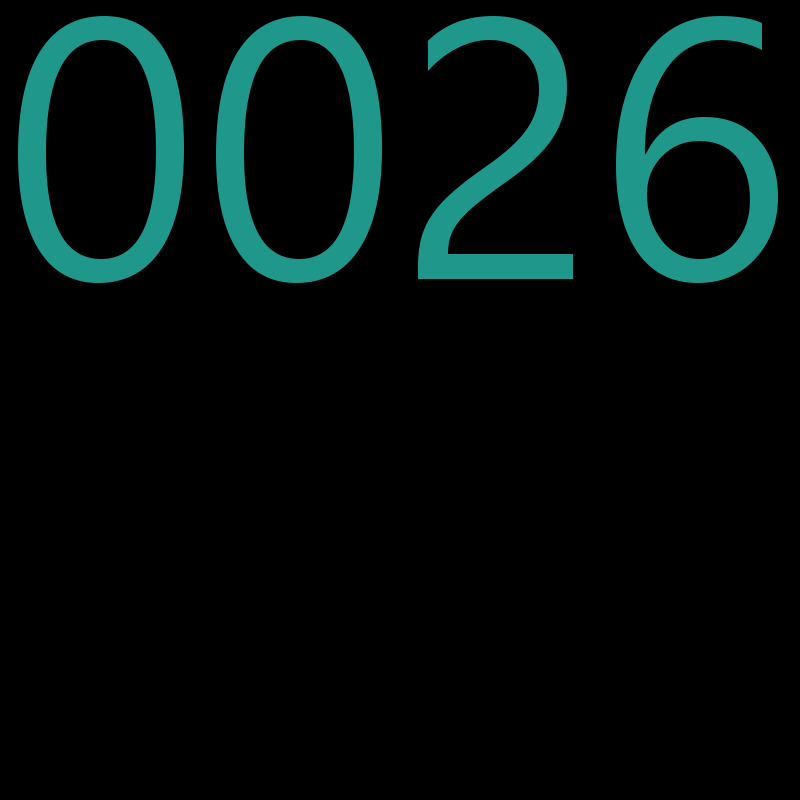

In [60]:
cloud.to_image()